In [2]:
import pickle
from tqdm import tqdm_notebook as tqdm
import pandas
import numpy
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [3]:
import os

In [4]:
entry_categories=dict()

In [5]:
for filename in tqdm(os.listdir('./data/dump')):
    if filename.startswith('metadata_'):
        data=pickle.load(open('./data/dump/%s'%filename,'rb'))
        for entry,meta_data in data.items():
            if meta_data['categories']==[]:
                continue
            entry_categories[entry]=meta_data['categories']

In [6]:
visit_count_df=pickle.load(open('./data/dump/merged_metadata.pkl','rb'))
visit_count_df['Title']=visit_count_df.index

In [7]:
visit_count_df.head()

,category_num,frequency,image_num,language_num,link_num,update,vandalism,in_degree,out_degree,page_len,Title
$1,4.0,7791.0,1.0,1.0,45.0,0.0,0.0,0.0,11.0,2476.0,$1
"$10,000_unsecured_visa_or_mastercards",0.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"$10,000_unsecured_visa_or_mastercards"
'O_Sole_Mio,0.0,897.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,25.0,'O_Sole_Mio
(Don't_Fear)_The_Reaper,14.0,970.0,9.0,9.0,443.0,17.0,0.0,40.0,170.0,26292.0,(Don't_Fear)_The_Reaper
(I_Can't_Get_No)_Satisfaction,49.0,667.0,11.0,31.0,590.0,10.0,0.0,71.0,228.0,37360.0,(I_Can't_Get_No)_Satisfaction


In [8]:
visit_count_df=visit_count_df[visit_count_df['Title'].isin(entry_categories)]

In [9]:
visit_count_df.values.shape

(63782, 11)

In [13]:
category_visit_count=dict()
for value in visit_count_df.values:
    for c in entry_categories[value[-1]]:
        if c.startswith('Category:Wikipedia'):
            continue
        value2=numpy.array(list(value[1:-1])+[1])
        try:
            category_visit_count[c]+=value2
        except:
            category_visit_count[c]=value2
data=[]
for category, value in category_visit_count.items():
    data.append([category]+list(value))

In [14]:
category_visit_df=pandas.DataFrame(data,columns=["Category"]+list(visit_count_df.columns)[1:-1]+["Title Count"])
for column in list(visit_count_df.columns)[1:-1]:
    category_visit_df['Avg_'+column]=category_visit_df[column]/category_visit_df['Title Count']

In [20]:
def seperate_list(array, bins = 10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    for j in range(0, bins):
        if len(cut)>0 and arrary1[delta * j]==cut[-1]:
            continue
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

In [21]:
category_visit_df['Avg_frequency'] = category_visit_df['Avg_frequency'].astype(
    int)
category_visit_df['avg_frequency_bin'] = pandas.cut(
    category_visit_df['Avg_frequency'],
    seperate_list(category_visit_df['Avg_frequency'].values, 20))

In [22]:
category_visit_df.head()

,Category,frequency,image_num,language_num,link_num,update,vandalism,in_degree,out_degree,page_len,...,Avg_frequency,Avg_image_num,Avg_language_num,Avg_link_num,Avg_update,Avg_vandalism,Avg_in_degree,Avg_out_degree,Avg_page_len,avg_frequency_bin
0,"Category:People from Ashfield, Massachusetts",2384.0,22.0,60.0,643.0,12.0,0.0,264.0,227.0,69629.0,...,1192,11.000000,30.000000,321.500000,6.000000,0.000000,132.000000,113.500000,34814.500000,"(1138, 1249]"
1,Category:Continental Navy officers,693.0,24.0,13.0,813.0,15.0,0.0,71.0,166.0,61026.0,...,693,24.000000,13.000000,813.000000,15.000000,0.000000,71.000000,166.000000,61026.000000,"(653, 718]"
2,Category:Hollyoaks characters,28773.0,56.0,8.0,8128.0,916.0,2.0,810.0,1158.0,899325.0,...,1065,2.074074,0.296296,301.037037,33.925926,0.074074,30.000000,42.888889,33308.333333,"(1034, 1138]"
3,Category:Anticholinesterases,7786.0,19.0,48.0,3516.0,68.0,0.0,330.0,465.0,156955.0,...,7786,19.000000,48.000000,3516.000000,68.000000,0.000000,330.000000,465.000000,156955.000000,"(6426, 217926]"
4,Category:People from St Albans,12341.0,32.0,165.0,1726.0,238.0,1.0,487.0,420.0,193926.0,...,4113,10.666667,55.000000,575.333333,79.333333,0.333333,162.333333,140.000000,64642.000000,"(3615, 4487]"


In [135]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os
from scipy.stats import pearsonr

In [24]:
len(category_visit_df)

155177

In [35]:
interested_columns=list(visit_count_df.columns)[2:-1]

In [36]:
interested_columns

['image_num',
 'language_num',
 'link_num',
 'update',
 'vandalism',
 'in_degree',
 'out_degree',
 'page_len']

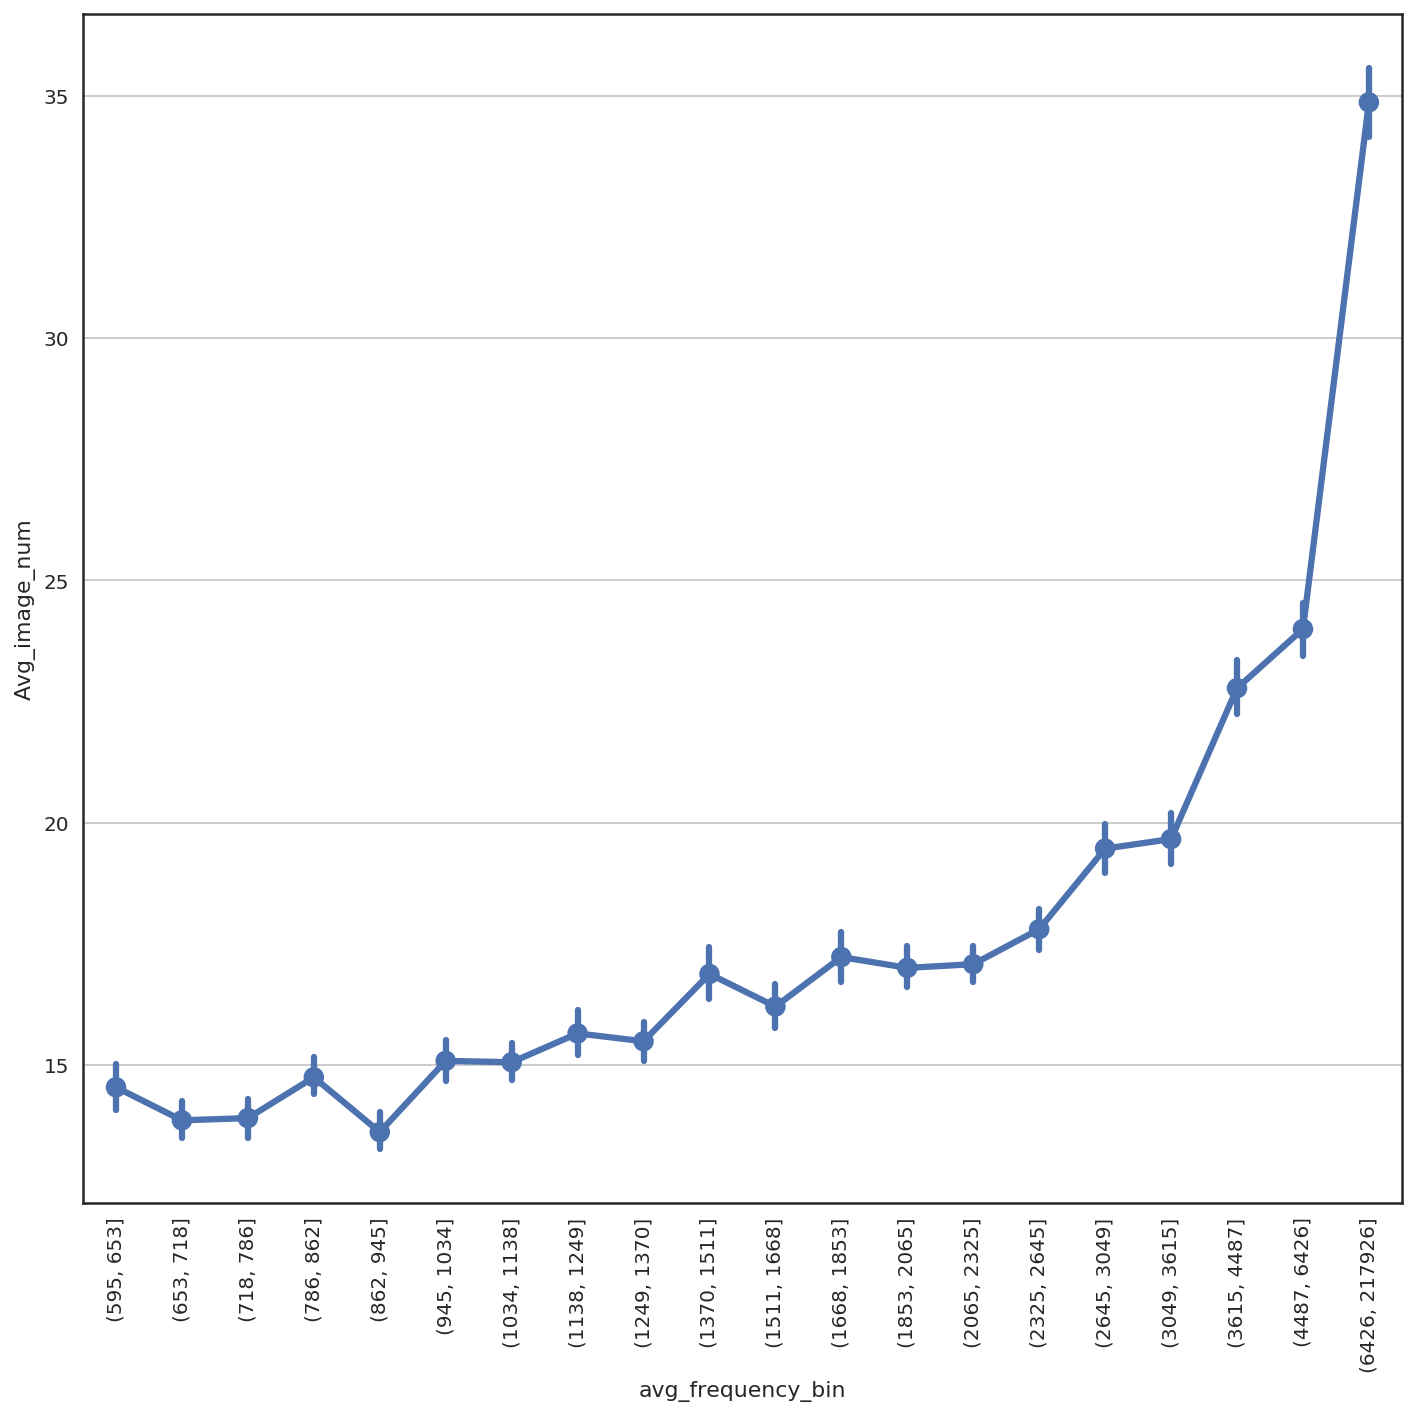

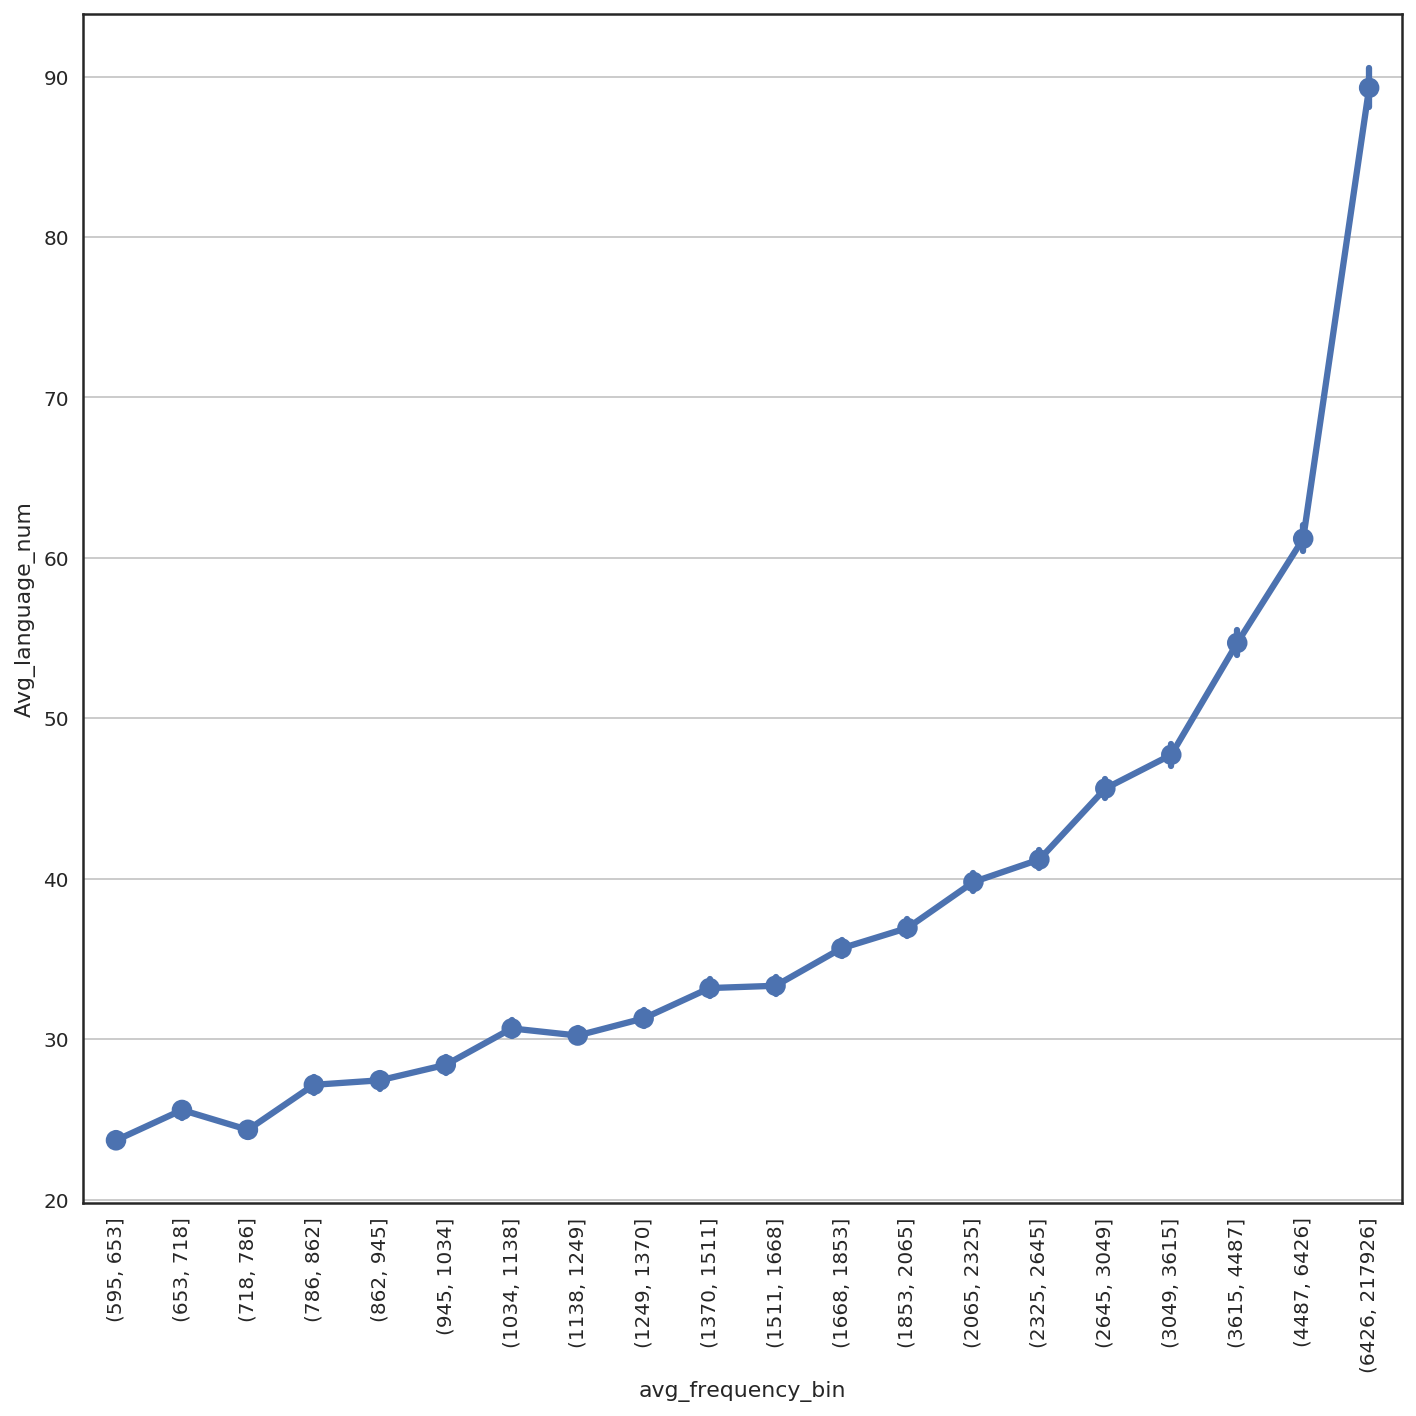

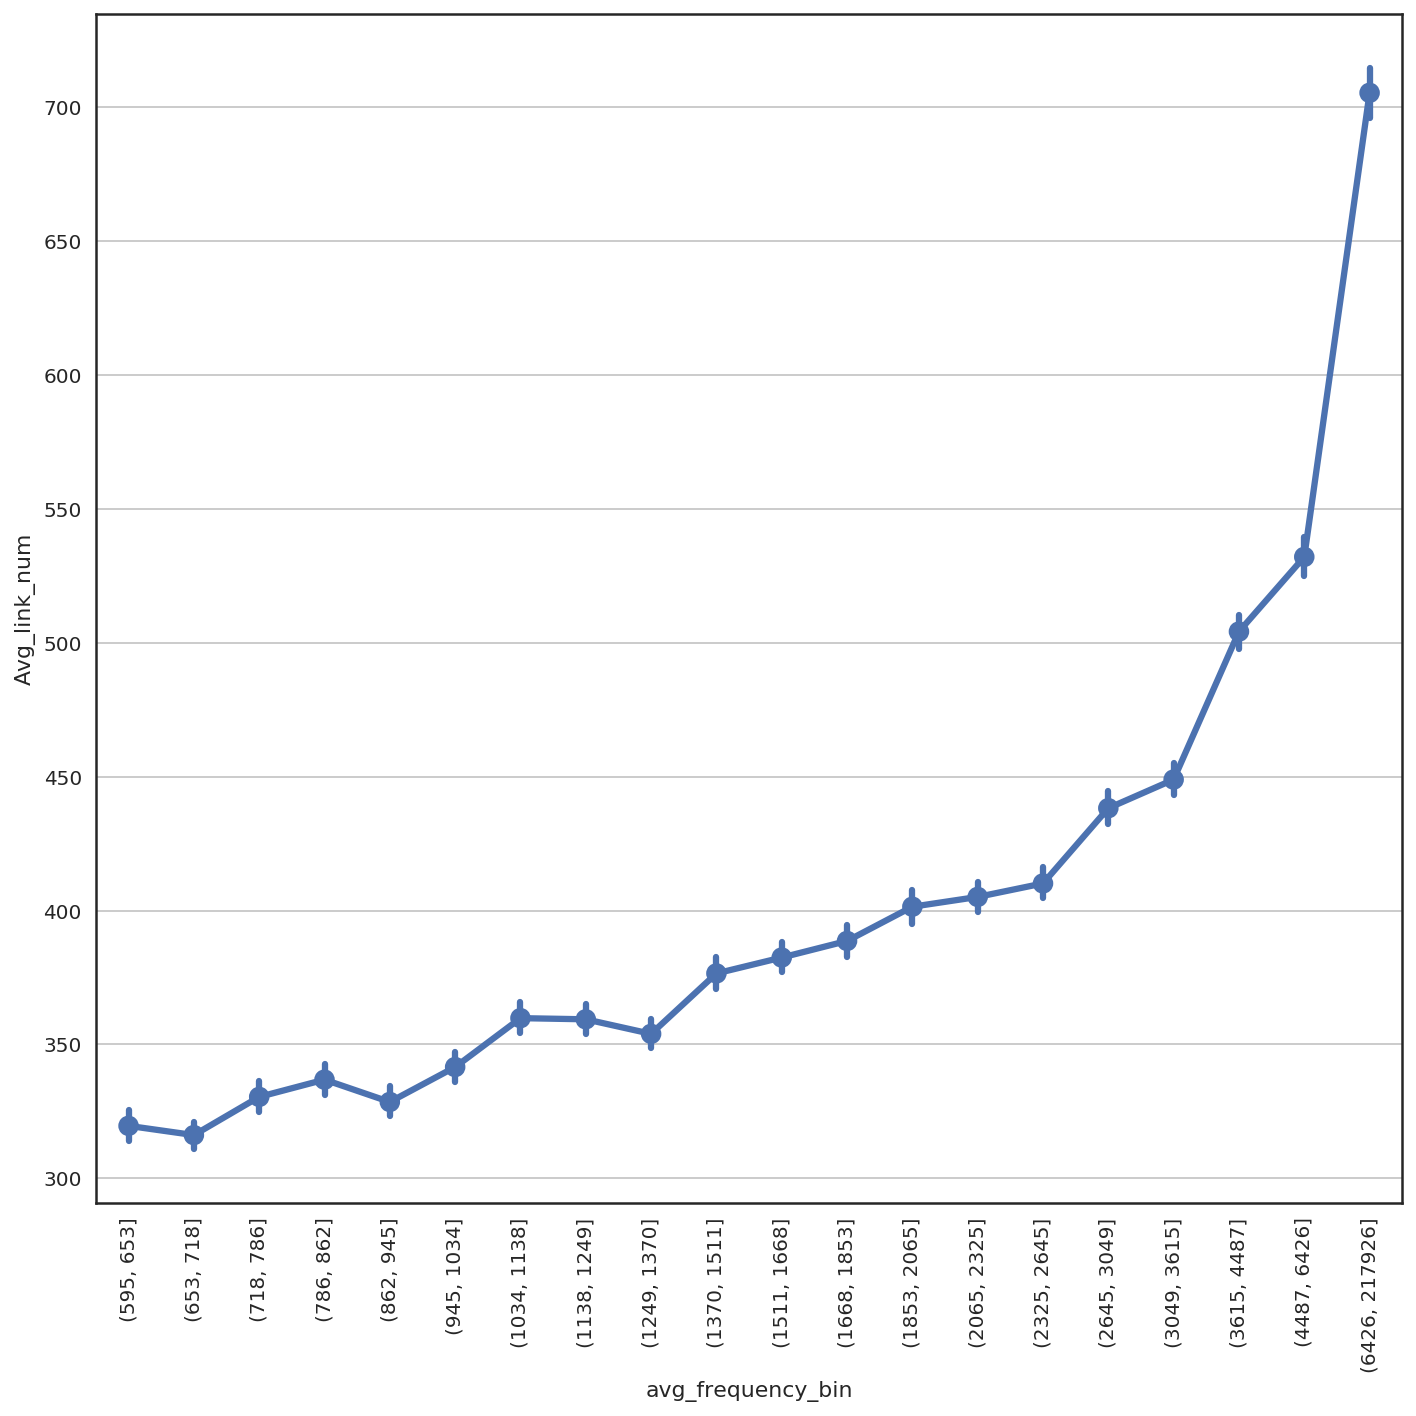

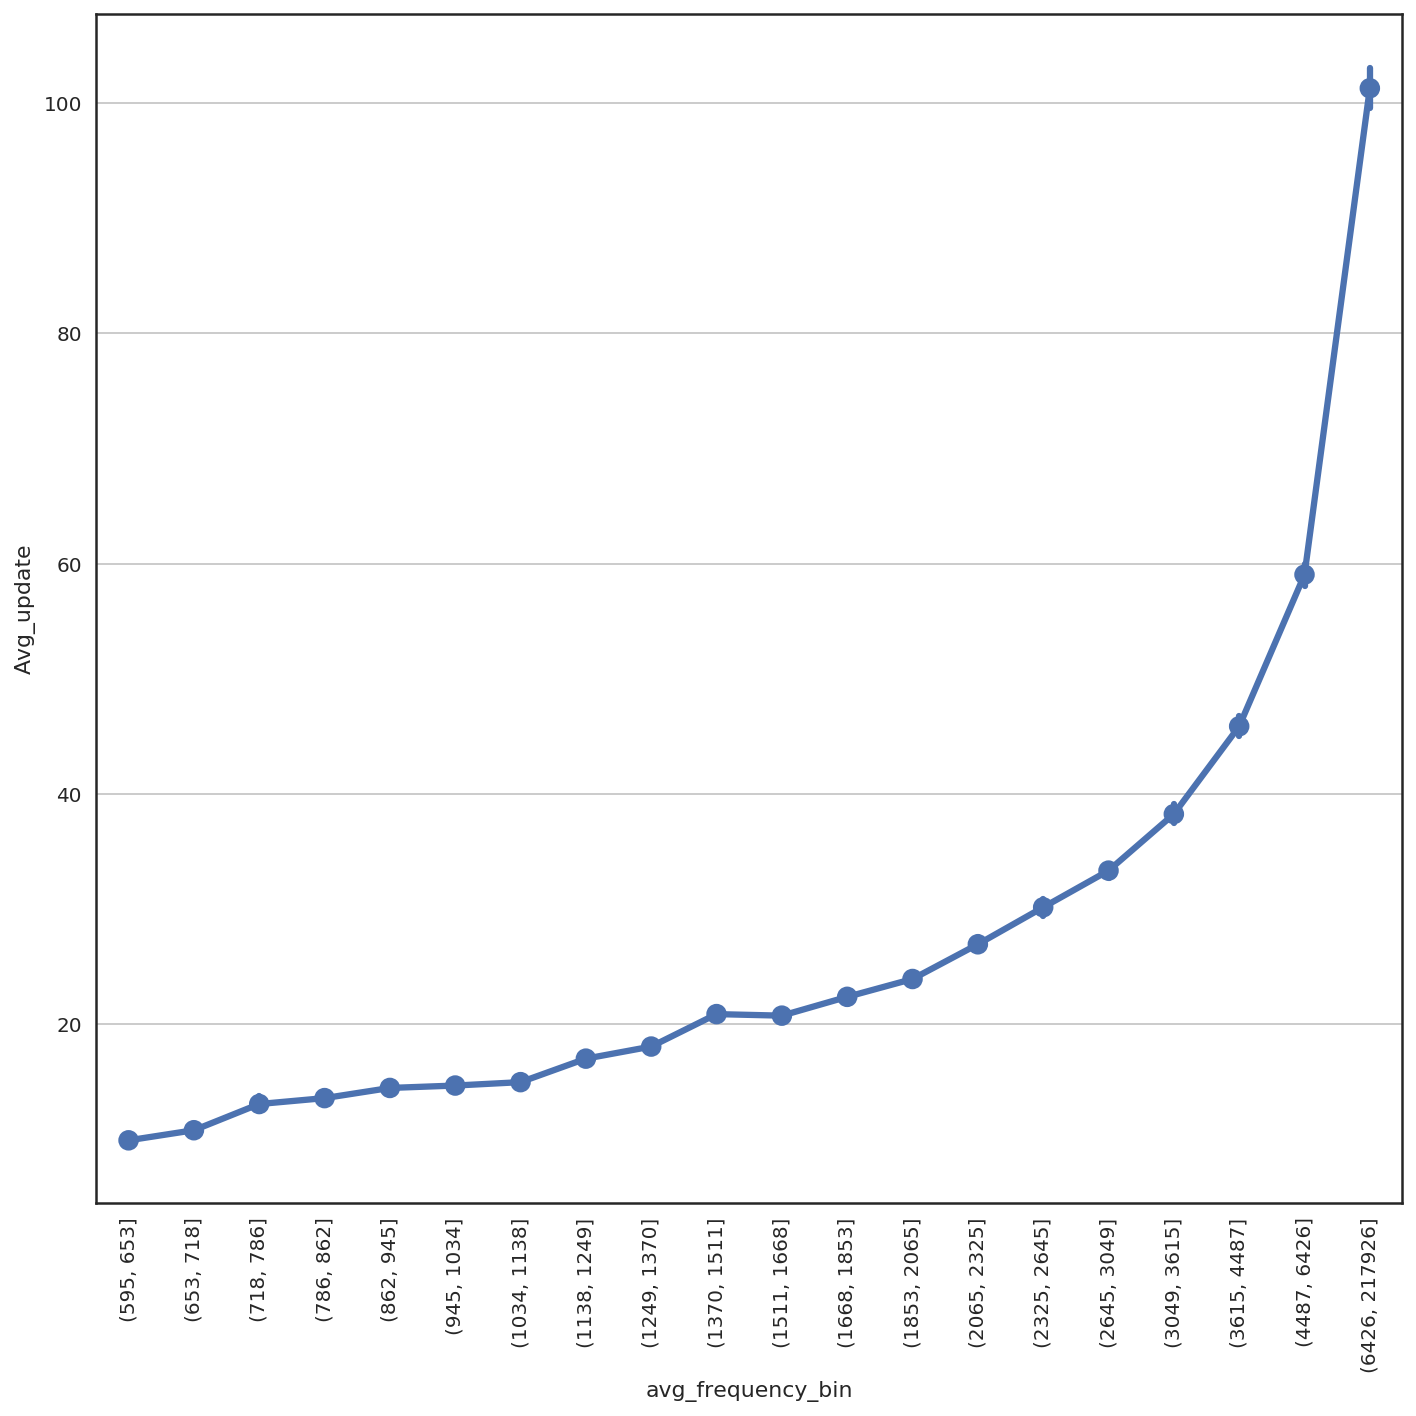

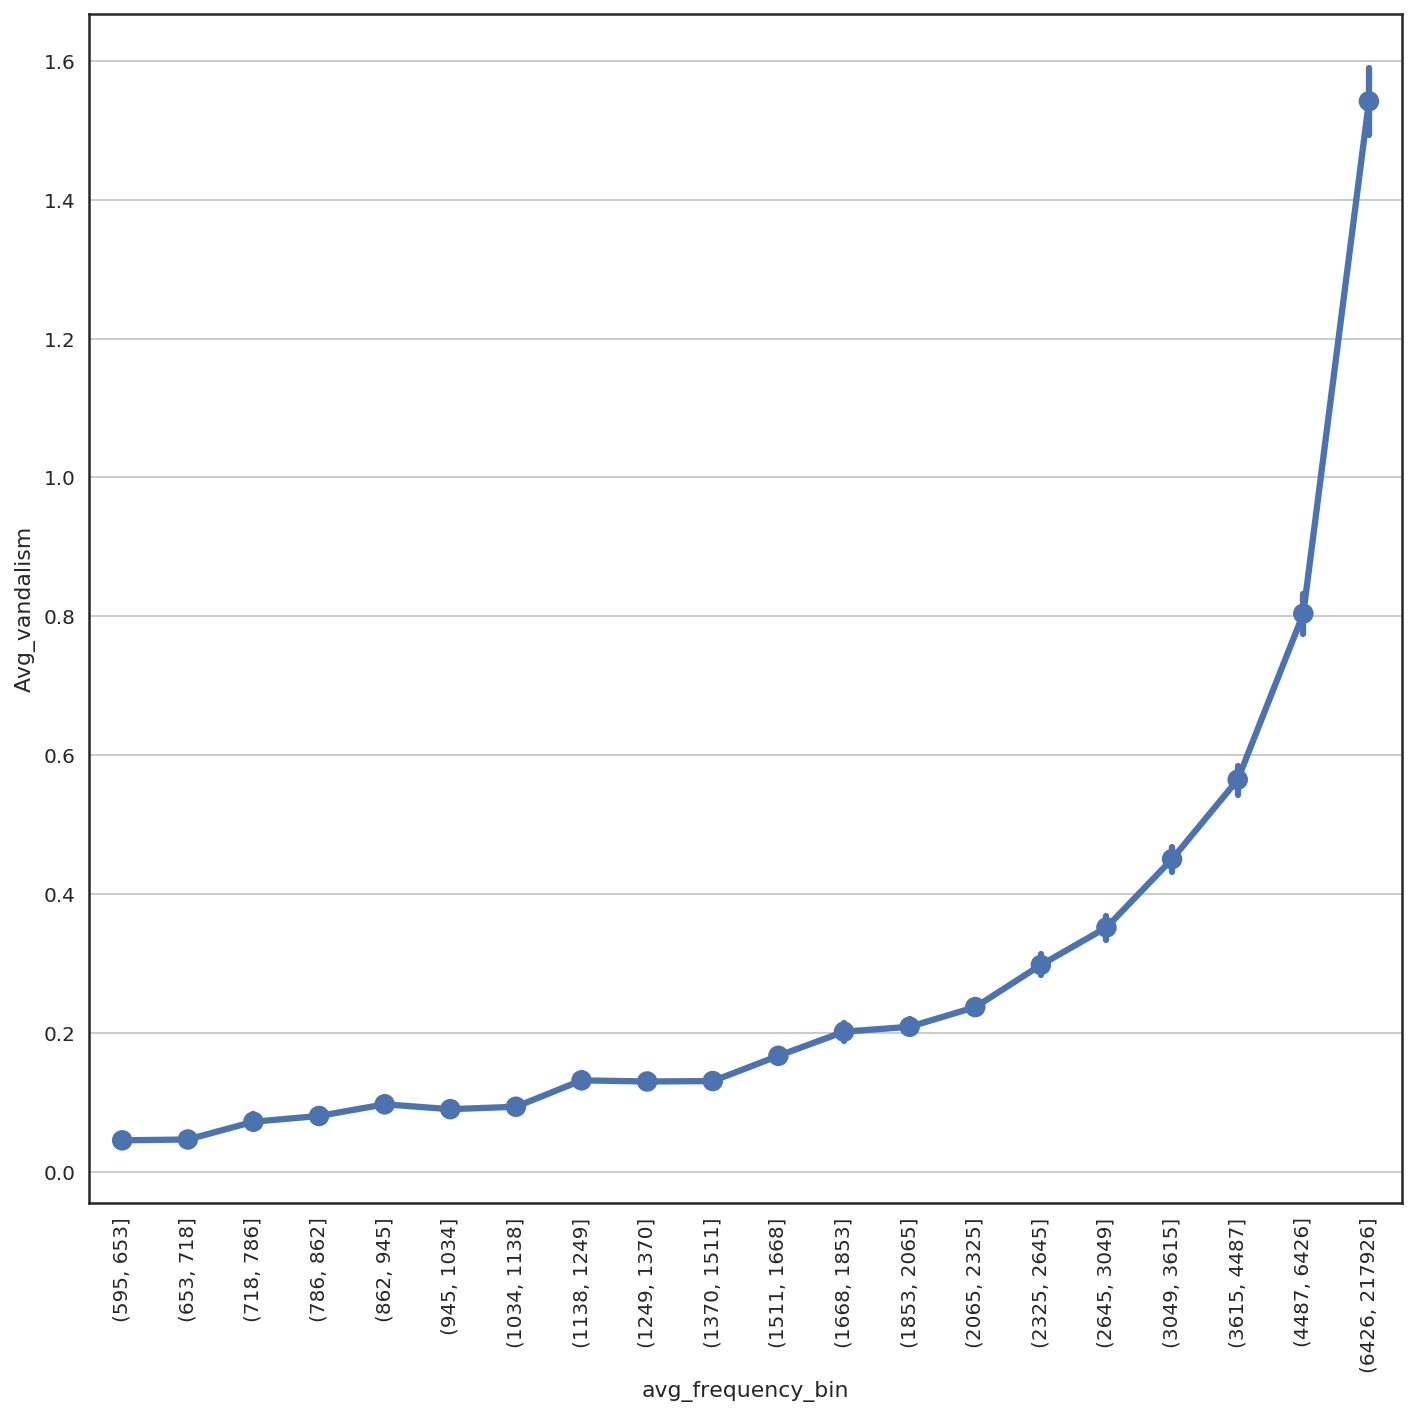

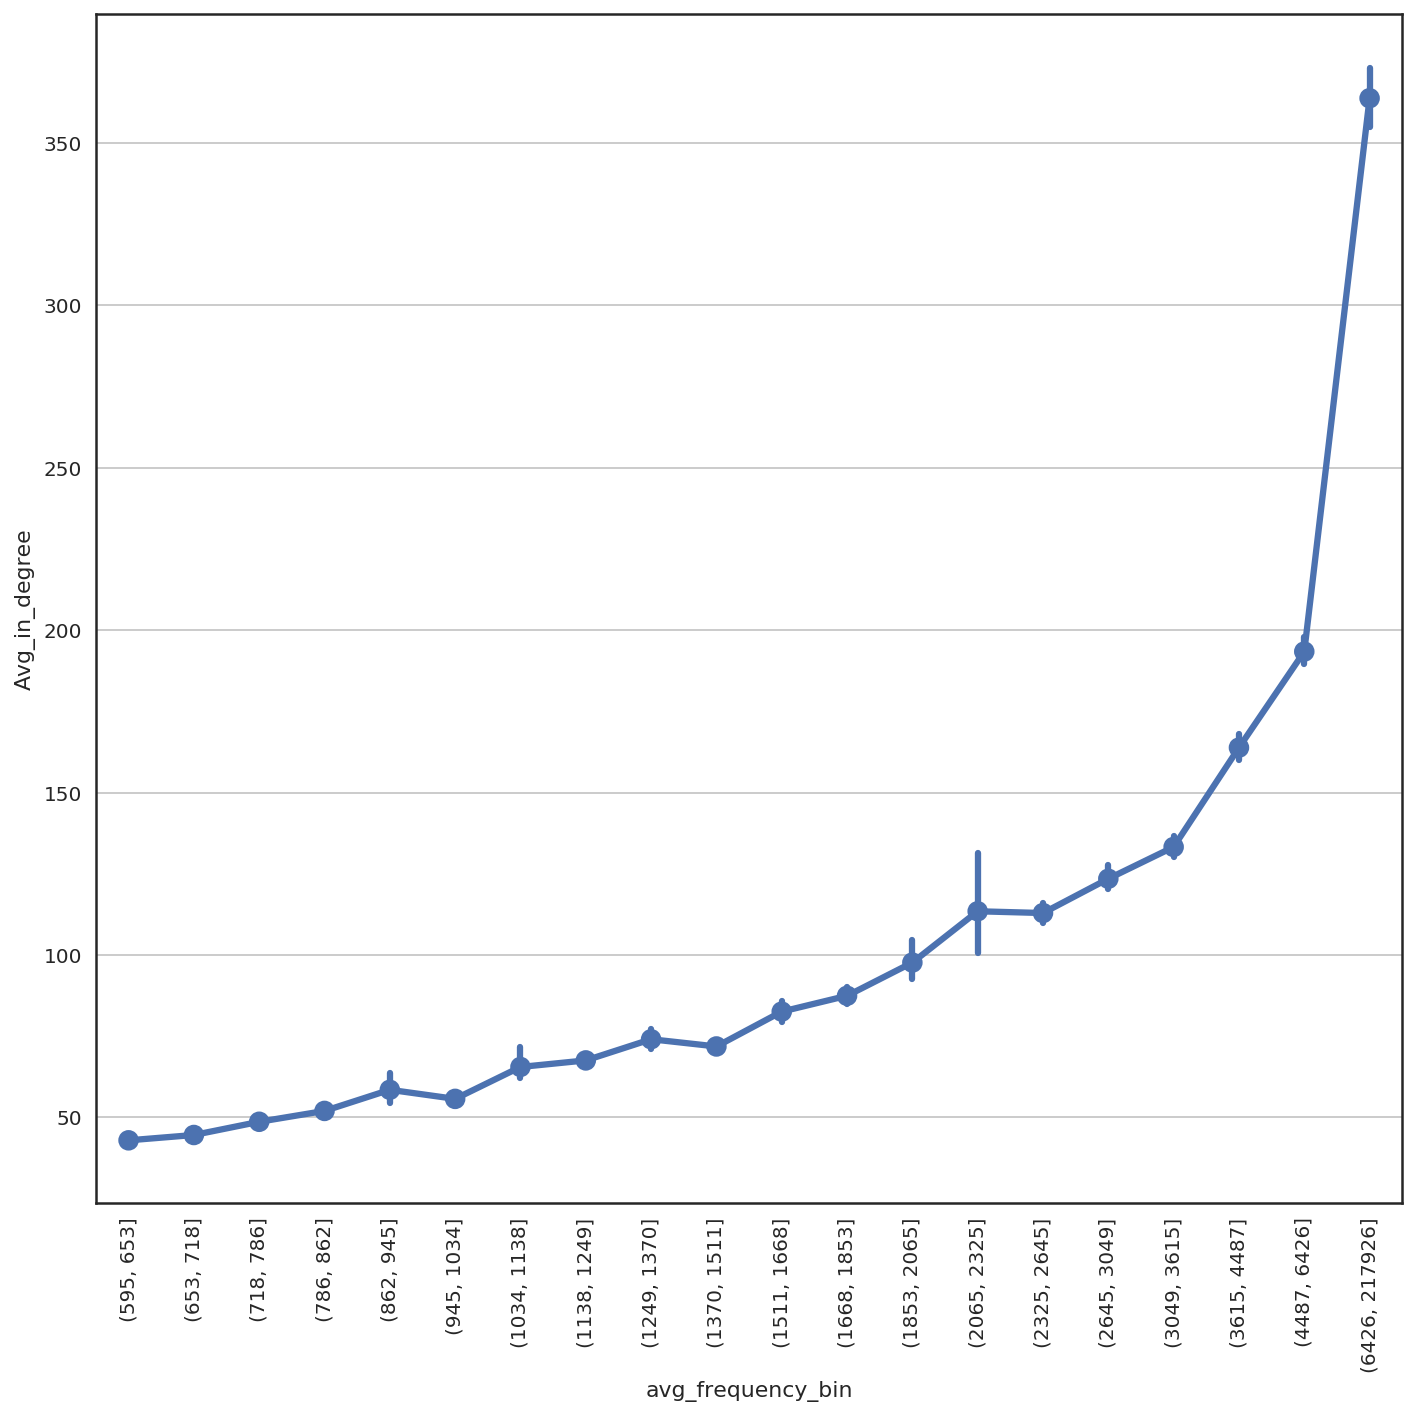

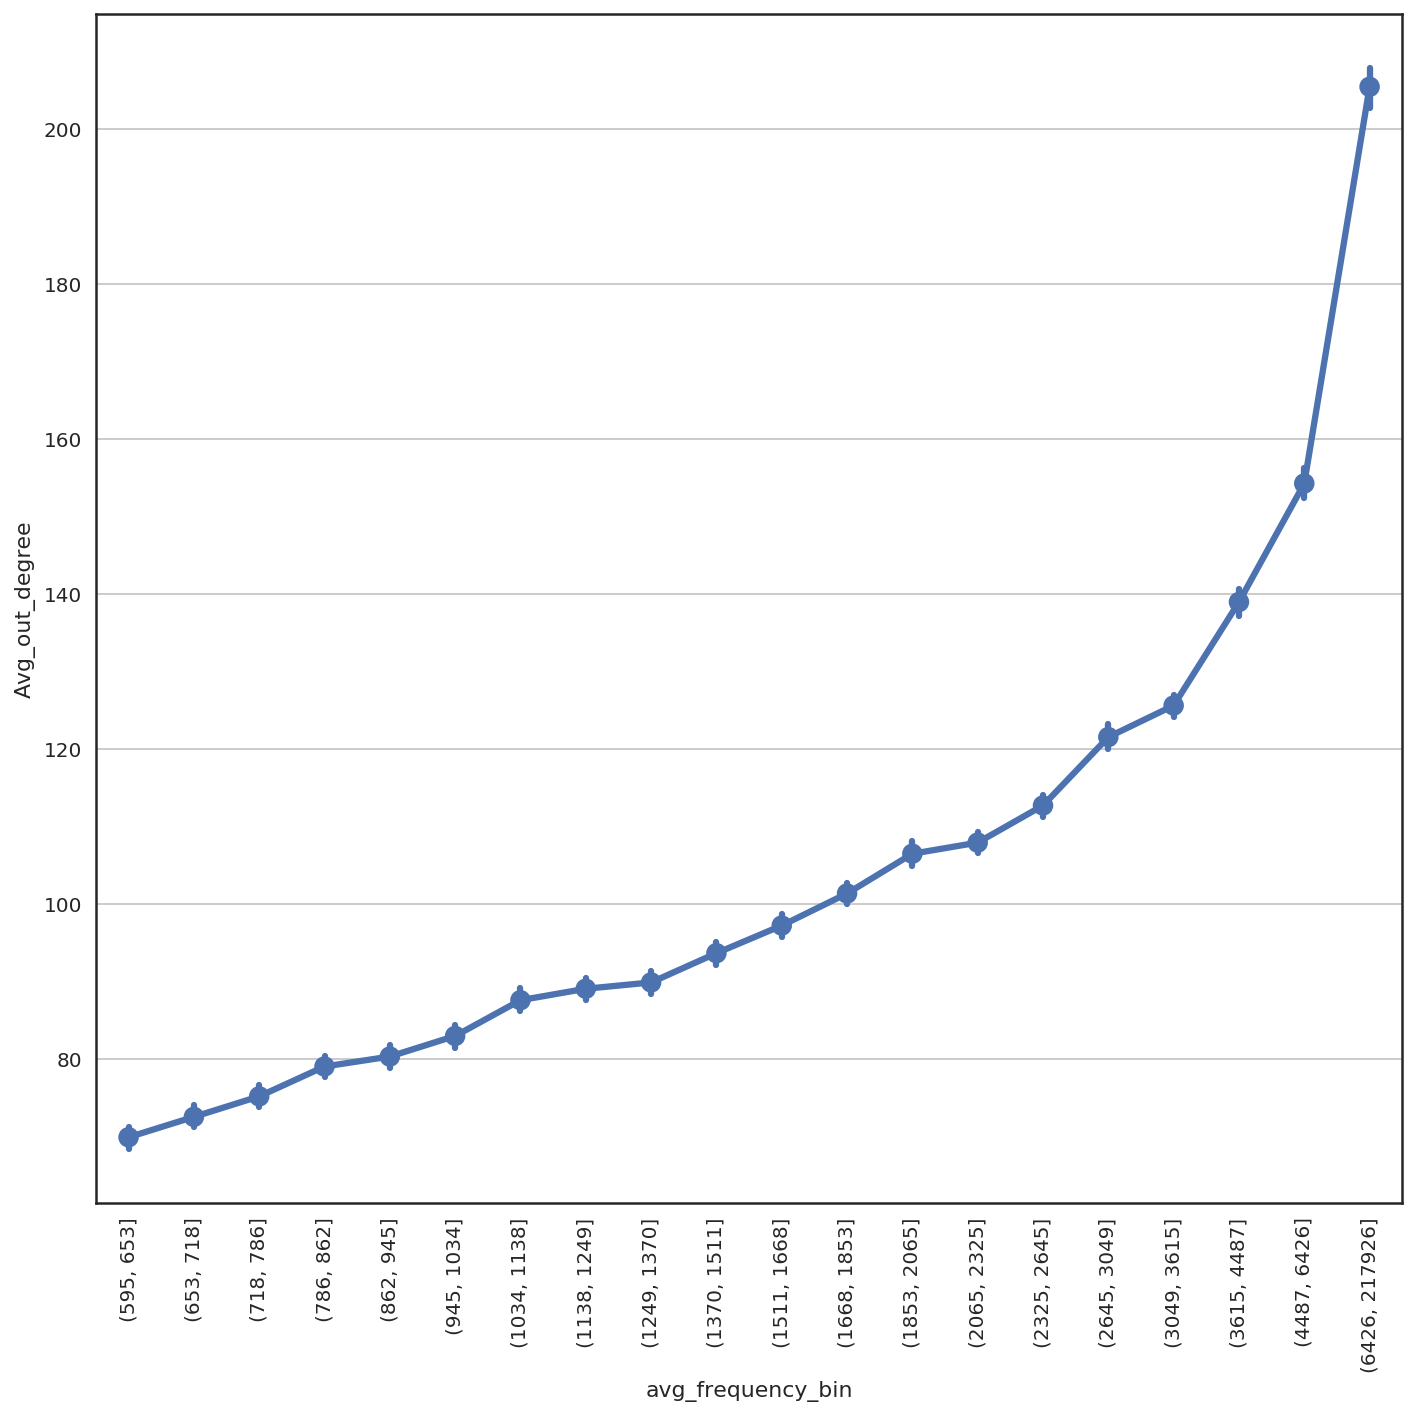

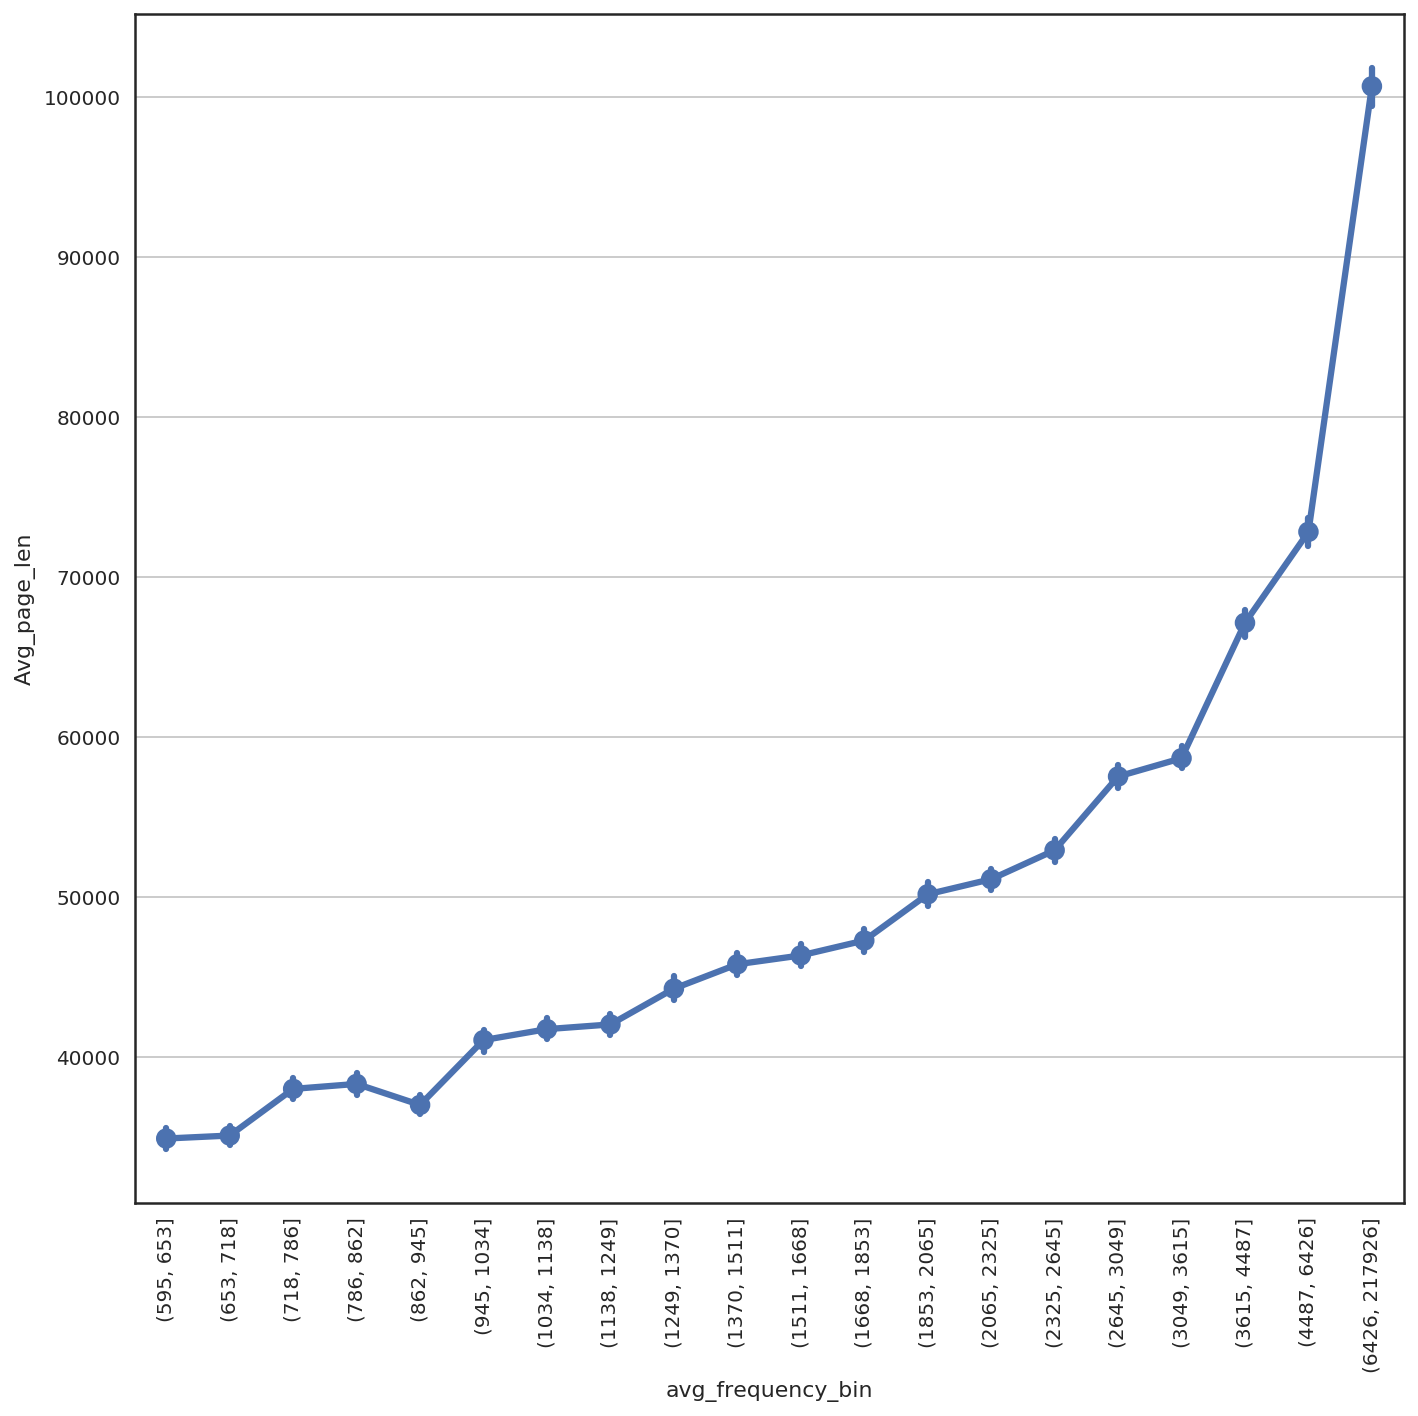

,Meta Data,Pearson’s correlation coefficient,P-value
0,image_num,0.192900,0.0
1,language_num,0.397530,0.0
2,link_num,0.257889,0.0
3,update,0.566016,0.0
4,vandalism,0.381302,0.0
5,in_degree,0.259519,0.0
6,out_degree,0.292718,0.0
7,page_len,0.347605,0.0


In [136]:
data=[]
for column in interested_columns:
    plt.figure(figsize=(10,10))
    sns.pointplot(x='avg_frequency_bin', y='Avg_'+column,data=category_visit_df)
    v,pv=pearsonr(visit_count_df["frequency"].values, visit_count_df[column].values)
    data.append([column,v,pv])
    plt.xticks(rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./plots/topic7/frequency_vs_%s.png'%column,dpi=400)
    plt.show()
pandas.DataFrame(data,columns=['Meta Data','Pearson’s correlation coefficient','P-value'])

In [39]:
columns=['Avg_'+column for column in interested_columns]
data=category_visit_df[columns].values

In [40]:
data=numpy.log(data+1)

In [41]:
corr=numpy.corrcoef(data,rowvar=False)

In [42]:
corr_df=pandas.DataFrame(corr,columns=columns,index=columns)

<Figure size 720x720 with 0 Axes>

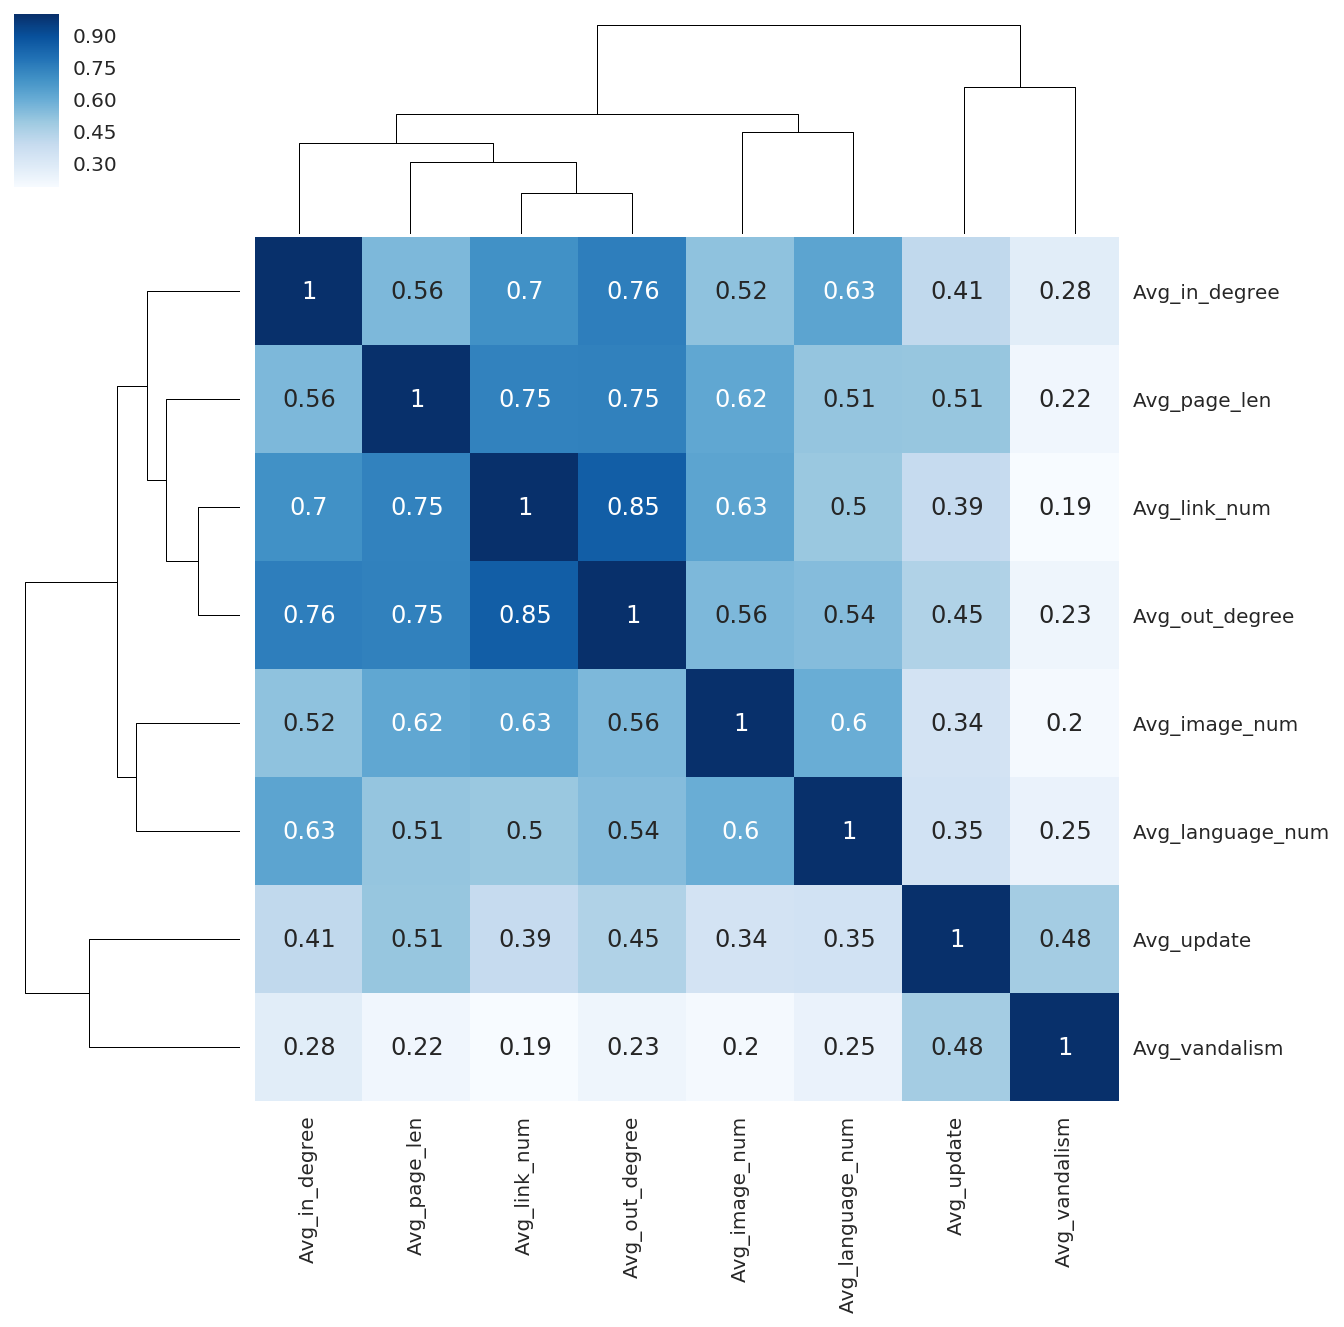

In [63]:
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((9,9), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
sns.clustermap(corr_df, cmap='Blues', square=True,annot=True)
plt.savefig("./plots/topic7/corr_matrix.png", dpi=400)
plt.show()

In [45]:
from sklearn import linear_model
from sklearn import preprocessing

In [114]:
X=category_visit_df[columns].values
y=category_visit_df['Avg_frequency']
X=preprocessing.MinMaxScaler().fit_transform(X)

In [121]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
y_pred=lr.predict(X)

In [122]:
result=pandas.DataFrame({'y':y,'y_pred':y_pred})

In [123]:
result=result[result['y']<30000]
result=result[result['y_pred']<30000]

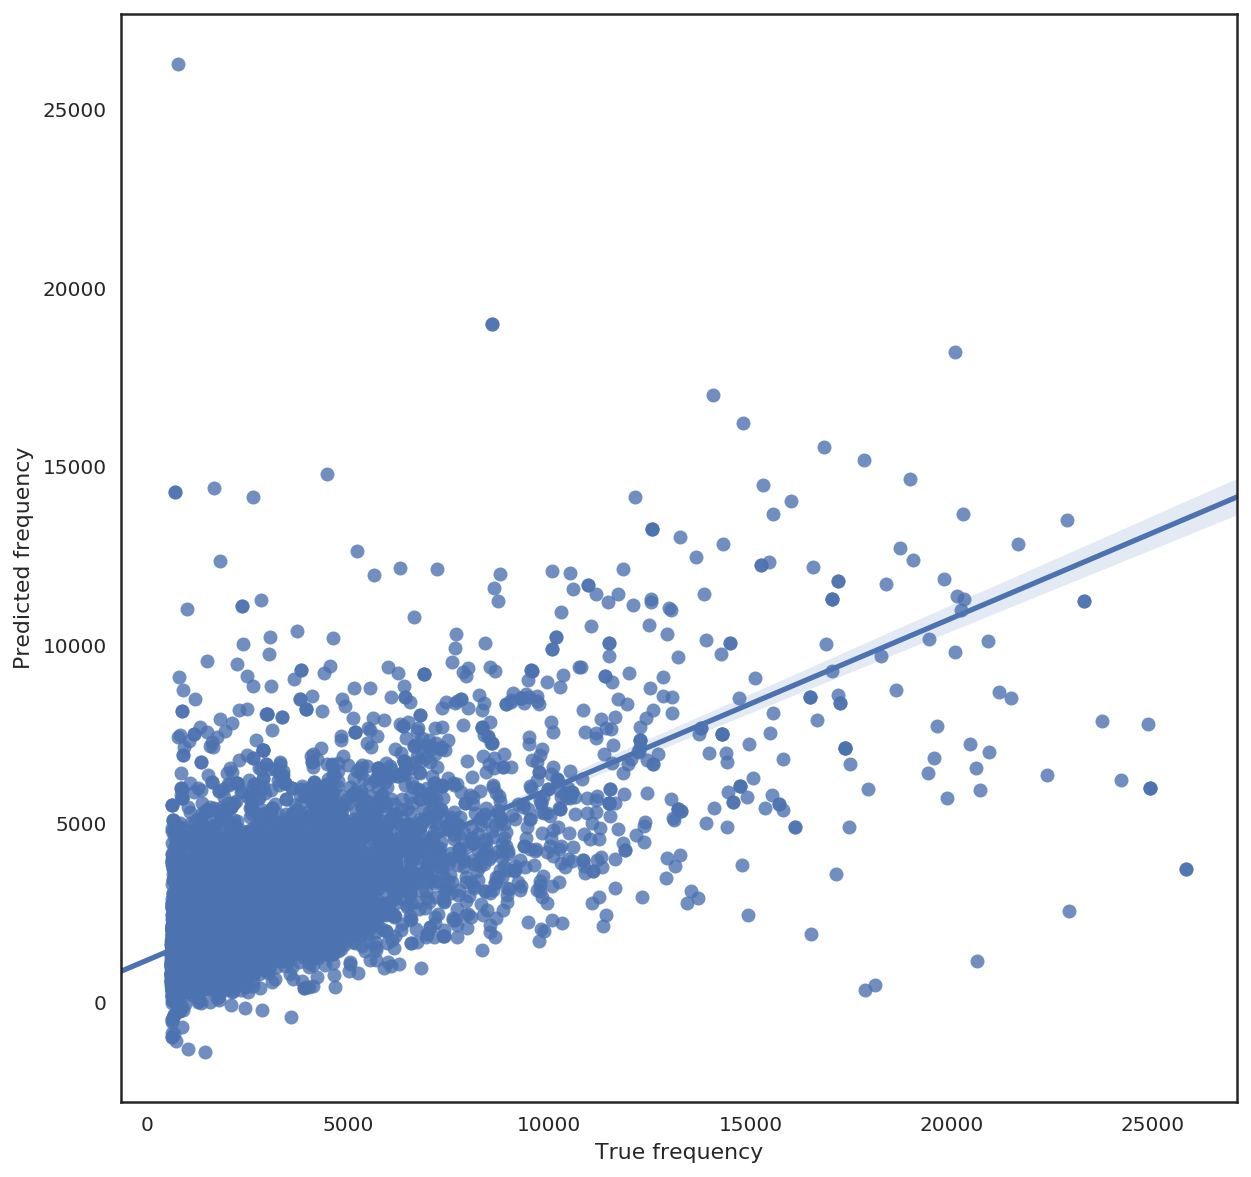

In [124]:
plt.figure(figsize=(10,10))
sns.regplot(x='y',y='y_pred',data=result.sample(frac=0.1))
plt.xlabel('True frequency')
plt.ylabel('Predicted frequency')
plt.savefig('./plots/topic7/Regression.png', dpi=400)
plt.show()

In [137]:
lr.score(X,y)

0.4676545194899553

In [125]:
coef = pandas.DataFrame(
    list(
        zip(columns, lr.coef_,
            ['Linear Regression' for _ in range(len(interested_columns))])),
    columns=['Meta Data', 'Coefficient', 'Method'])

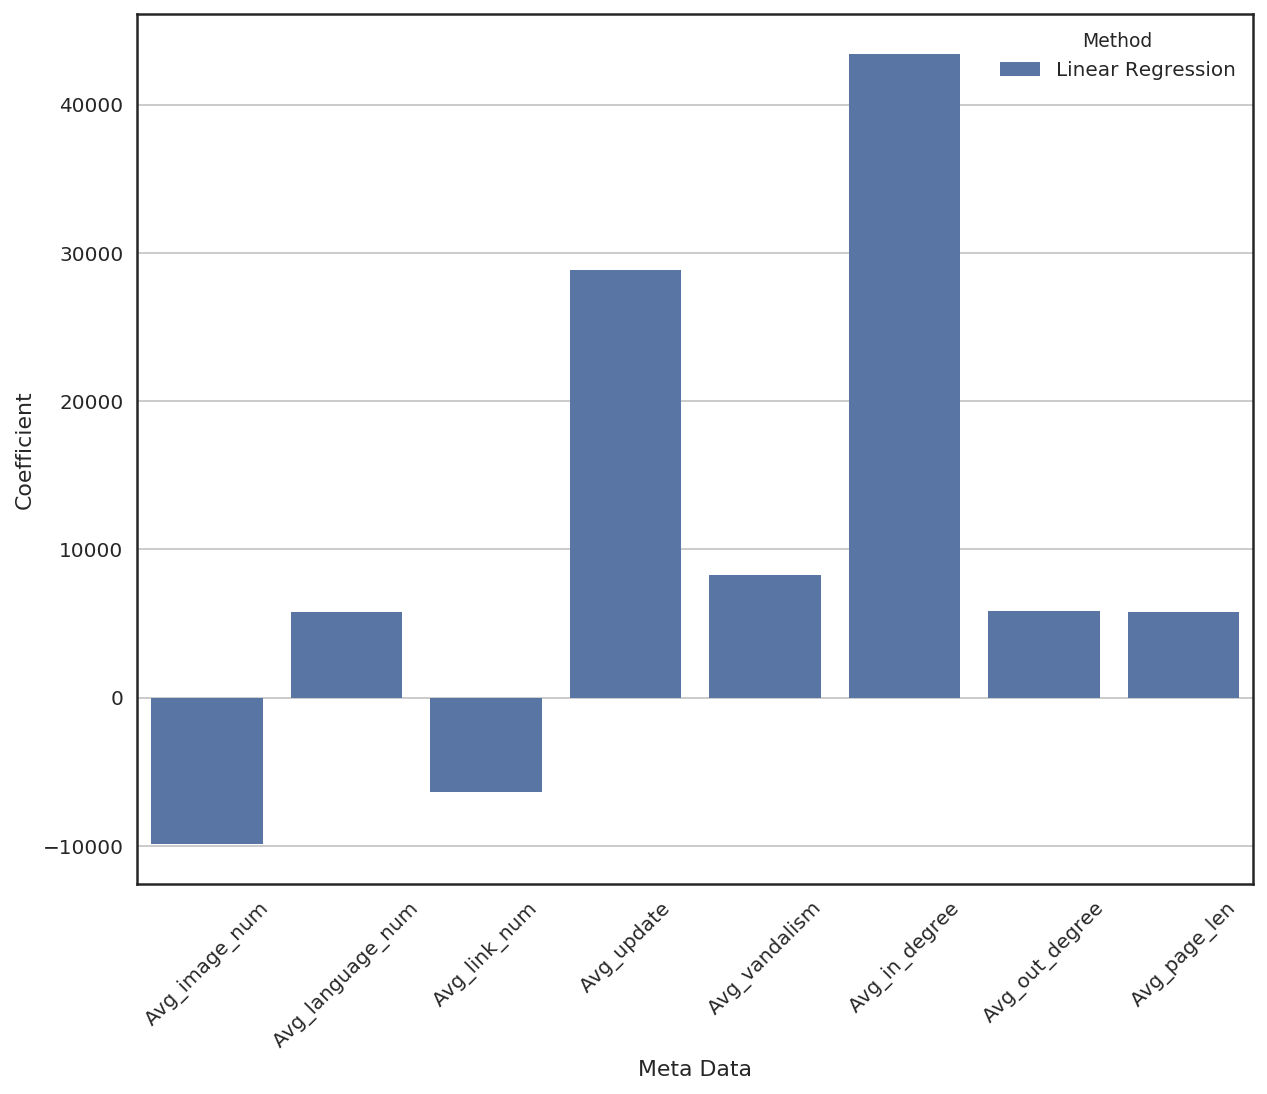

In [126]:
plt.figure(figsize=(10,8))
sns.barplot(x='Meta Data',y='Coefficient',hue='Method',data=coef)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('./plots/topic7/feature_weight.png', dpi=400)
plt.show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


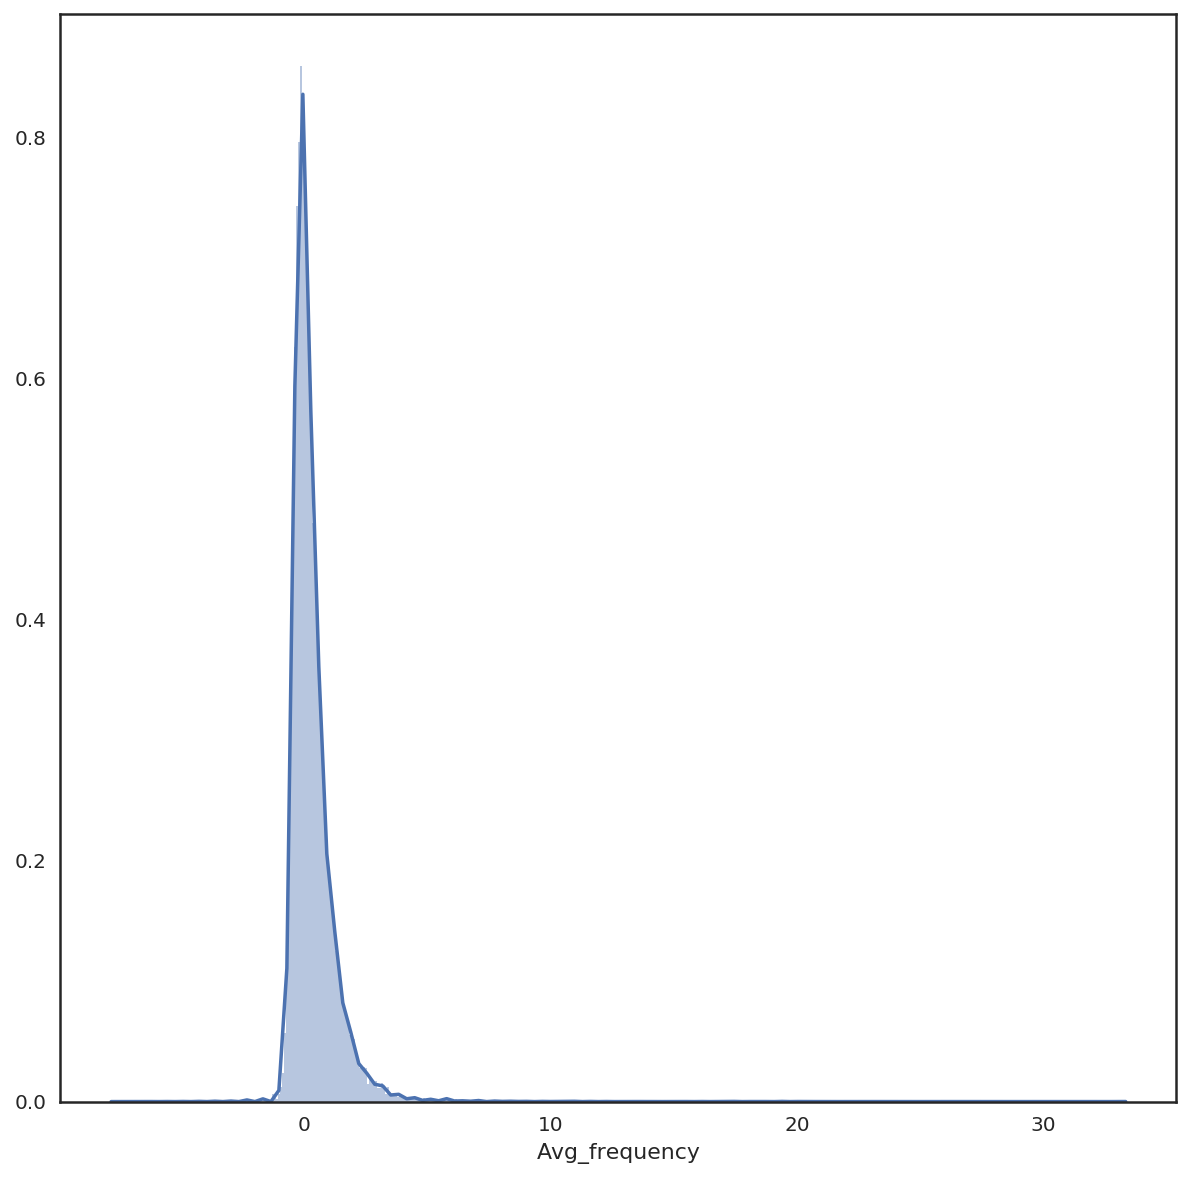

In [130]:
plt.figure(figsize=(10,10))
err=(y_pred-y)/y
sns.distplot(err,bins=500)
plt.savefig('./plots/topic1/error_distribution.png', dpi=400)
plt.show()

In [131]:
from scipy.stats import kstest

In [132]:
kstest(err, 'norm')

KstestResult(statistic=0.24588405361442459, pvalue=0.0)

In [133]:
!zip plots/topic7/topic7.zip plots/topic7/*.png

updating: plots/topic7/Regression.png (deflated 13%)
updating: plots/topic7/corr_matrix.png (deflated 16%)
updating: plots/topic7/error_distribution.png (deflated 44%)
updating: plots/topic7/feature_weight.png (deflated 26%)
updating: plots/topic7/frequency_image_num.png (deflated 22%)
updating: plots/topic7/frequency_in_degree.png (deflated 22%)
updating: plots/topic7/frequency_language_num.png (deflated 22%)
updating: plots/topic7/frequency_link_num.png (deflated 21%)
updating: plots/topic7/frequency_out_degree.png (deflated 22%)
updating: plots/topic7/frequency_page_len.png (deflated 21%)
updating: plots/topic7/frequency_update.png (deflated 23%)
updating: plots/topic7/frequency_vandalism.png (deflated 22%)
updating: plots/topic7/frequency_vs_image_num.png (deflated 22%)
updating: plots/topic7/frequency_vs_in_degree.png (deflated 22%)
updating: plots/topic7/frequency_vs_language_num.png (deflated 21%)
updating: plots/topic7/frequency_vs_link_num.png (deflated 21%)
updating: plots/to